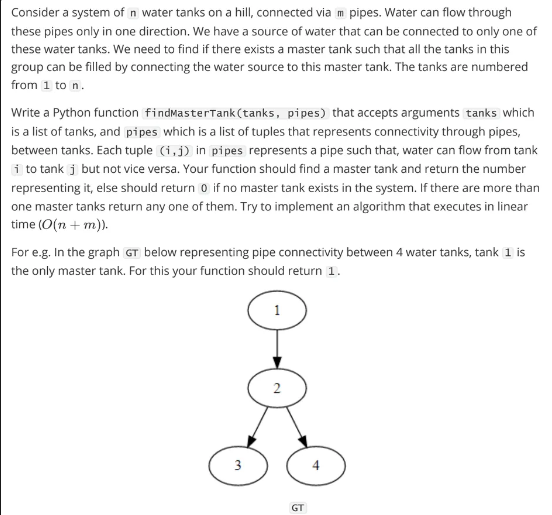

In [1]:
def findMasterTank(tanks,pipes):
    #calculating indegree
    indegree={}
    for tank in tanks:
        indegree[tank]=0
    for pipe in pipes:
        indegree[pipe[1]]+=1
       
    #Finding Master tanks
    Master=[]
    for tank in tanks:
        if indegree[tank]==0:
            Master.append(tank)
    return Master[0] if Master else None


In [3]:
#Test cases

print(findMasterTank([1,2,3,4],[(1,2),(2,3),(2,4)])) #1

print(findMasterTank([1,2,3,4,5,6,7,8,9,10],[[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10]])) #1



1
1



# GitHub Copilot
To solve this problem, we need to identify a tank with no incoming pipes (in-degree of 0) and ensure that all other tanks can be reached from this tank. This can be done using the following steps:

- Calculate In-Degree: Calculate the in-degree for each tank.
- Identify Potential Master Tanks: Identify tanks with an in-degree of 0.
- Check Reachability: Ensure that all other tanks can be reached from the identified master tank using a Depth-First Search (DFS) or Breadth-First Search (BFS).

In [ ]:
def findMasterTank(tanks, pipes):
    # Calculate in-degree for each tank
    in_degree = {tank: 0 for tank in tanks}
    adjacency_list = {tank: [] for tank in tanks}
    
    for pipe in pipes:
        in_degree[pipe[1]] += 1
        adjacency_list[pipe[0]].append(pipe[1])
    
    # Find potential master tanks (tanks with in-degree 0)
    potential_masters = [tank for tank in tanks if in_degree[tank] == 0]
    
    if not potential_masters:
        return 0
    
    # Function to perform BFS and check reachability
    def bfs(start, total_tanks):
        visited = set()
        queue = [start]
        while queue:
            current = queue.pop(0)
            if current not in visited:
                visited.add(current)
                for neighbor in adjacency_list[current]:
                    if neighbor not in visited:
                        queue.append(neighbor)
        return len(visited) == total_tanks
    
    # Check if any potential master tank can reach all other tanks
    for master in potential_masters:
        if bfs(master, len(tanks)):
            return master
    
    return 0

# Test cases
print(findMasterTank([1, 2, 3, 4], [(1, 2), (2, 3), (2, 4)]))  # Expected output: 1
print(findMasterTank([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]))  # Expected output: 1
